In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pandas.api.types import CategoricalDtype
from sklearn.neighbors import KNeighborsRegressor

In [111]:
pwd

'C:\\Users\\DANIEL\\Desktop\\gitfile\\ML'

In [112]:
bike = pd.read_csv(r"C:\Users\DANIEL\Documents\DataScience\data\BIKE_EX.csv")
bike.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,work day by moth,weathersit_by_moth,weathersit_by_moth.1,weathersit_by_moth.2,date
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0.65,0,1,0,1
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0.65,0,1,0,2
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0.65,1,0,0,3
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0.65,1,0,0,4
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0.65,1,0,0,5


In [113]:
bike.shape

(365, 17)

In [114]:
bike.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,work day by moth,weathersit_by_moth,weathersit_by_moth.1,weathersit_by_moth.2,date
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644,0.686658,0.619178,0.339726,0.041096,15.720548
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666,0.032468,0.486255,0.474266,0.198785,8.808321
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000,0.650000,0.000000,0.000000,0.000000,1.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000,0.650000,0.000000,0.000000,0.000000,8.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000,0.680000,1.000000,0.000000,0.000000,16.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000,0.730000,1.000000,1.000000,0.000000,23.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000,0.740000,1.000000,1.000000,1.000000,31.000000


In [115]:
bike.isna().sum()

id                      0
season                  0
mnth                    0
holiday                 0
weekday                 0
workingday              0
weathersit              0
temp                    0
atemp                   0
hum                     0
windspeed               0
cnt                     0
work day by moth        0
weathersit_by_moth      0
weathersit_by_moth.1    0
weathersit_by_moth.2    0
date                    0
dtype: int64

In [131]:
hist(bike$bik)


SyntaxError: invalid syntax (<ipython-input-131-31c3f4525377>, line 1)

In [31]:
bike2 = bike.copy()

In [34]:
bike2['season'] = bike2['season'].astype('category')

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


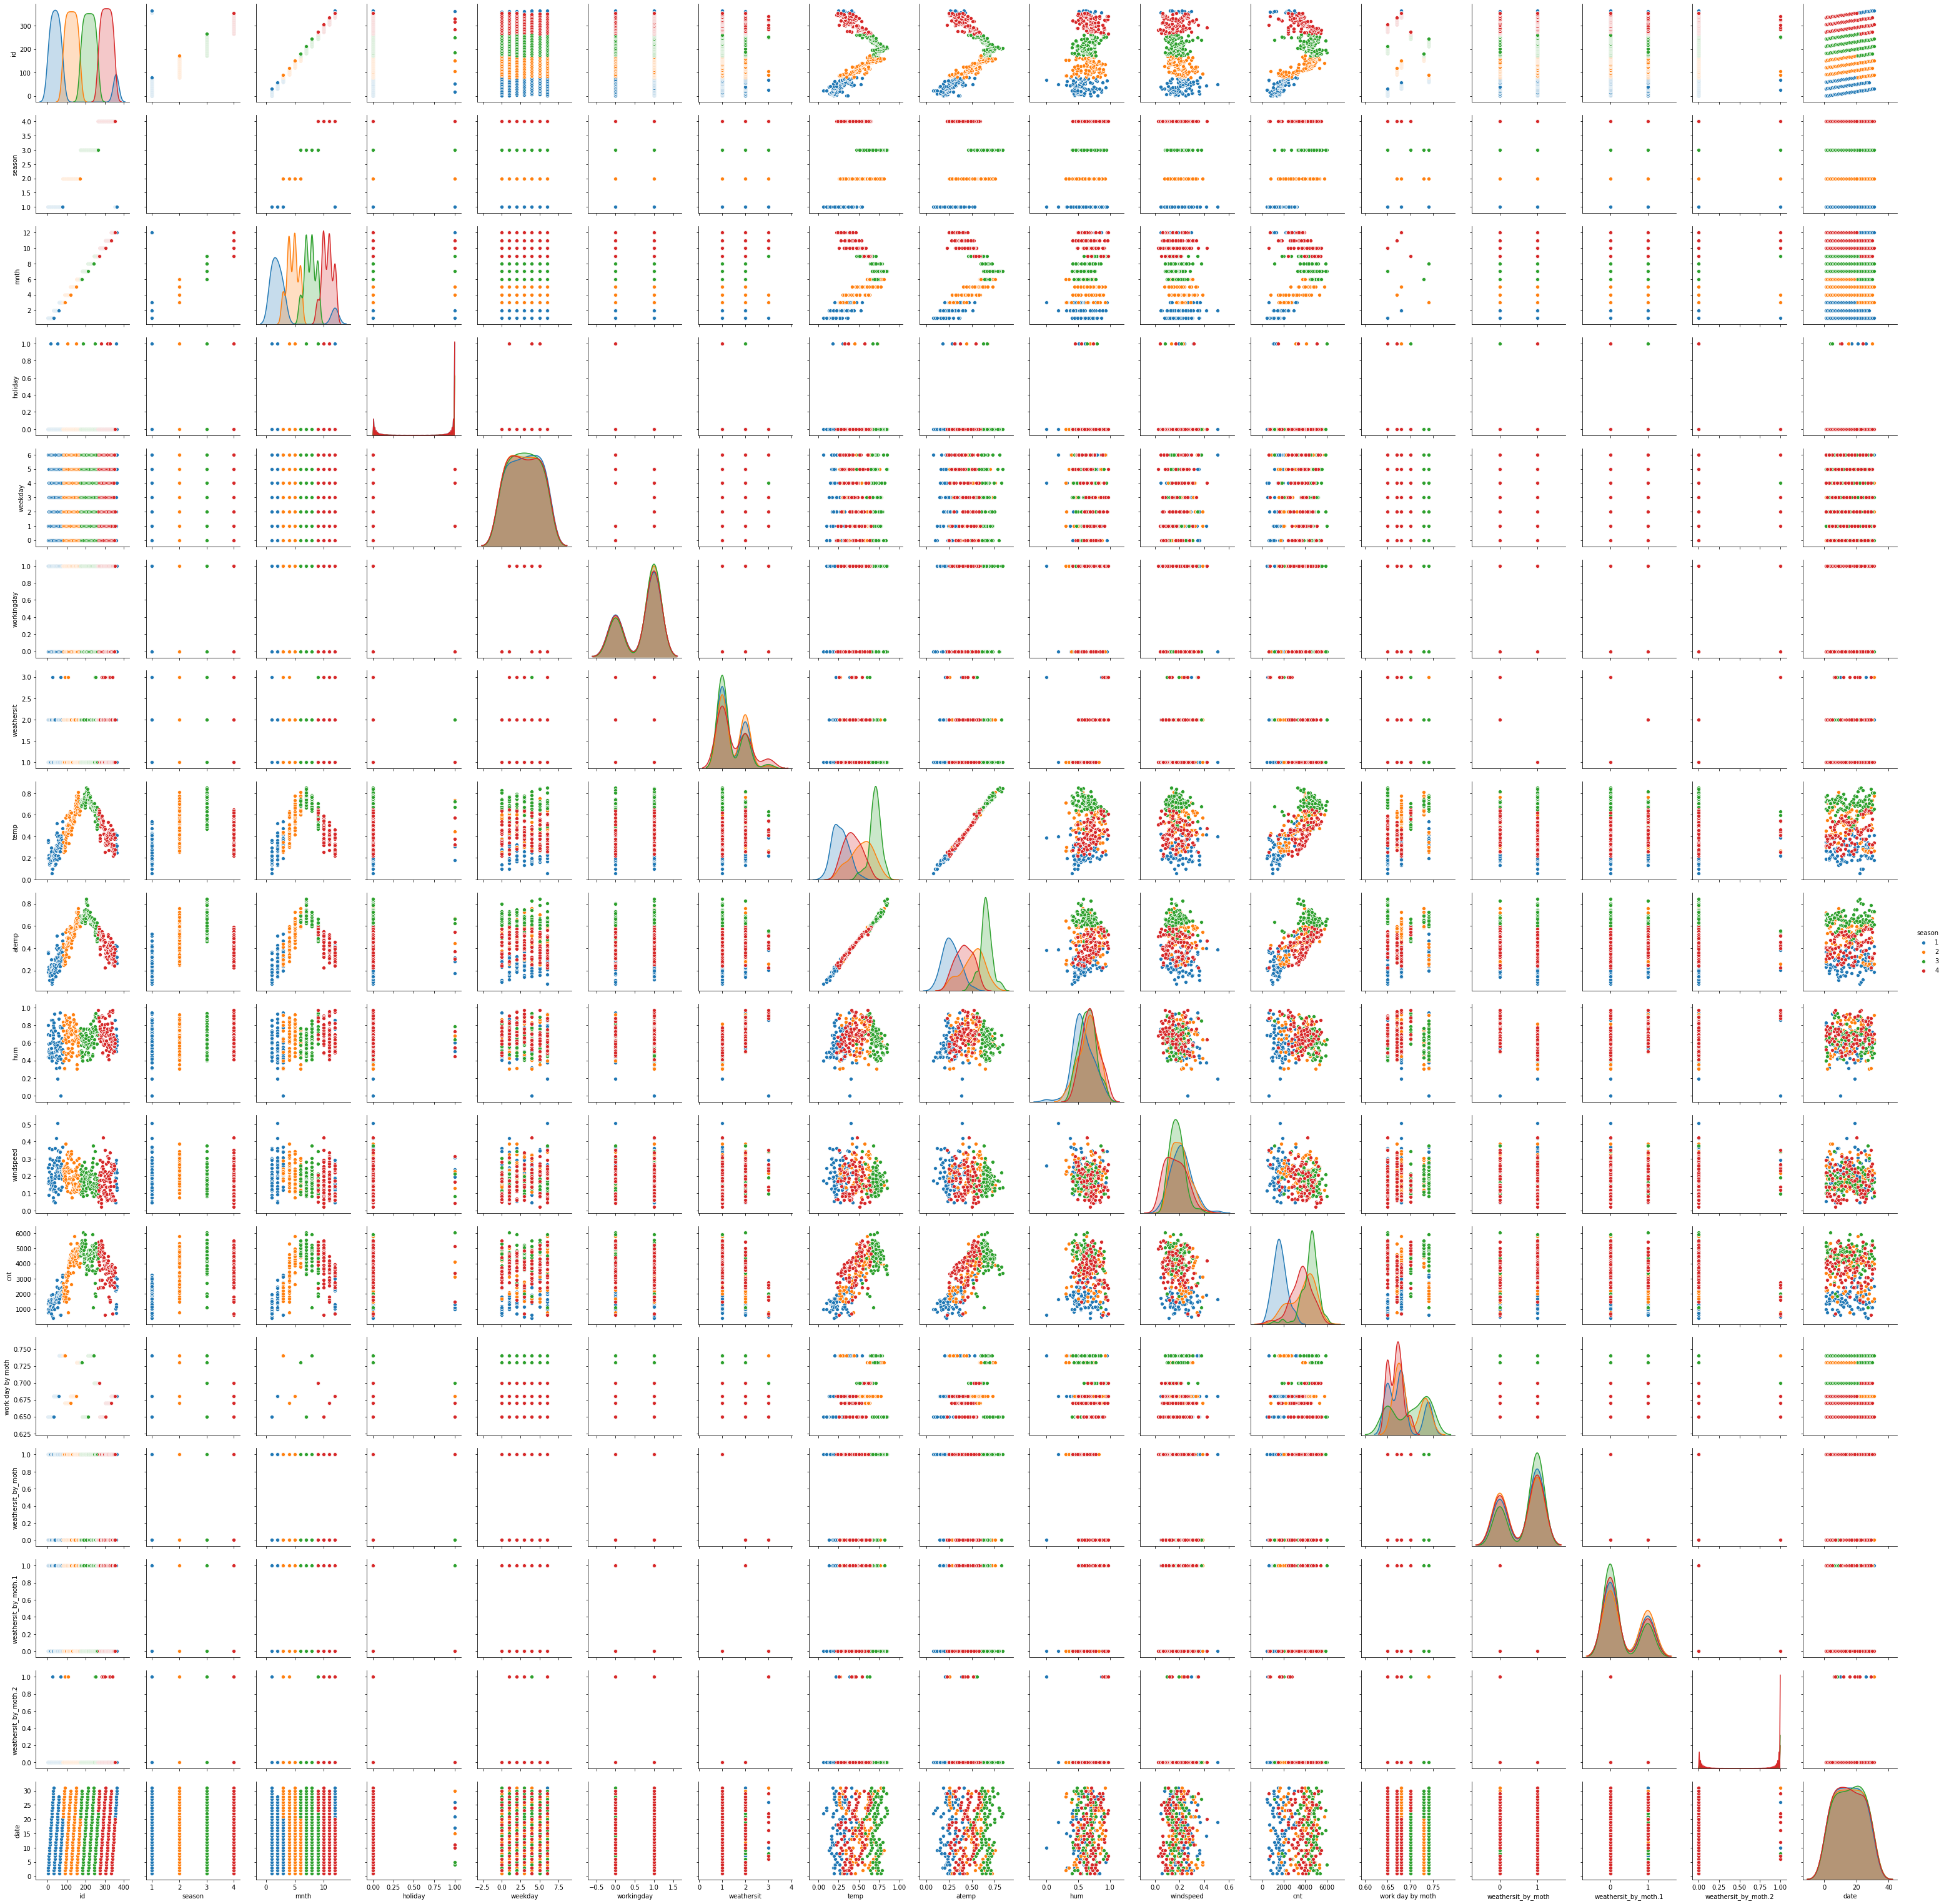

In [36]:
sns.pairplot(bike2,hue="season")

In [116]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
y = 'cnt'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)

In [101]:
y_test
y_test.head()
y_test.shape

(73, 17)

In [102]:
y_train
y_train.head()
y_train.shape

(292, 17)

In [127]:
mod = KNeighborRegressor(5).fit(X_train,y_train)

NameError: name 'KNeighborRegressor' is not defined

In [77]:
yhat1 = mod1.predict(X_train)
yhat1

NotFittedError: This LogisticRegression instance is not fitted yet

In [56]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[0.3235829 , 0.34227479, 0.33414232],
       [0.07783832, 0.25096018, 0.67120151],
       [0.22647937, 0.32626421, 0.44725642]])

In [57]:
pd.crosstab(y_train,yhat1)

,,col_0,2,4
row_0,row_1,row_2,,
1,4,2,1,2


In [58]:
mod1.score(X_train,y_train)

0.3333333333333333